## Ensemble Version Explanation
This ensemble is composed of 2 CNN models:
1. The first model uses RGB images (no transformations)
2. The second model uses grayscale local histogram normalized images

The 2 models use the same architecture: **CNN_C** (found in the file `vpc_cnn_c.py`). They only differ in the input data and input channels.

In [1]:
from importlib import reload

import vpc_ensemble_model_5c
import vpc_data

reload(vpc_ensemble_model_5c)
reload(vpc_data)

<module 'vpc_data' from 'c:\\Universidade\\vpc\\VPC-TP\\src\\ensemble_5c\\vpc_data.py'>

In [2]:
ensemble = vpc_ensemble_model_5c.EnsembleModel5C("EnsembleModel5C", img_size=30)

Model: "MemberModelC0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30, 1)]       0         
_________________________________________________________________
resizing (Resizing)          (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)     

In [3]:
ensemble.train_ensemble(epochs=120, stop_early=True)

Loading Training data from 43 directories
Training images loaded. Shuffling data.
X_train_gray.shape (31367, 30, 30, 1)
X_valid_gray.shape (7842, 30, 30, 1)
y_train.shape (31367,)
y_valid.shape (7842,)


c:\Users\badns\anaconda3\envs\deeplearning_v2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/120
980/980 [==============================] - 84s 77ms/step - loss: 2.0730 - accuracy: 0.4483 - val_loss: 0.7444 - val_accuracy: 0.7798

Epoch 00001: val_loss improved from inf to 0.74435, saving model to saved_models\EnsembleModel5C
INFO:tensorflow:Assets written to: saved_models\EnsembleModel5C\assets
Epoch 2/120
980/980 [==============================] - 72s 73ms/step - loss: 0.7108 - accuracy: 0.8005 - val_loss: 0.4227 - val_accuracy: 0.8571

Epoch 00002: val_loss improved from 0.74435 to 0.42271, saving model to saved_models\EnsembleModel5C
INFO:tensorflow:Assets written to: saved_models\EnsembleModel5C\assets
Epoch 3/120
980/980 [==============================] - 70s 71ms/step - loss: 0.4420 - accuracy: 0.8773 - val_loss: 0.1933 - val_accuracy: 0.9370

Epoch 00003: val_loss improved from 0.42271 to 0.19334, saving model to saved_models\EnsembleModel5C
INFO:tensorflow:Assets written to: saved_models\EnsembleModel5C\assets
Epoch 4/120
980/980 [=============================

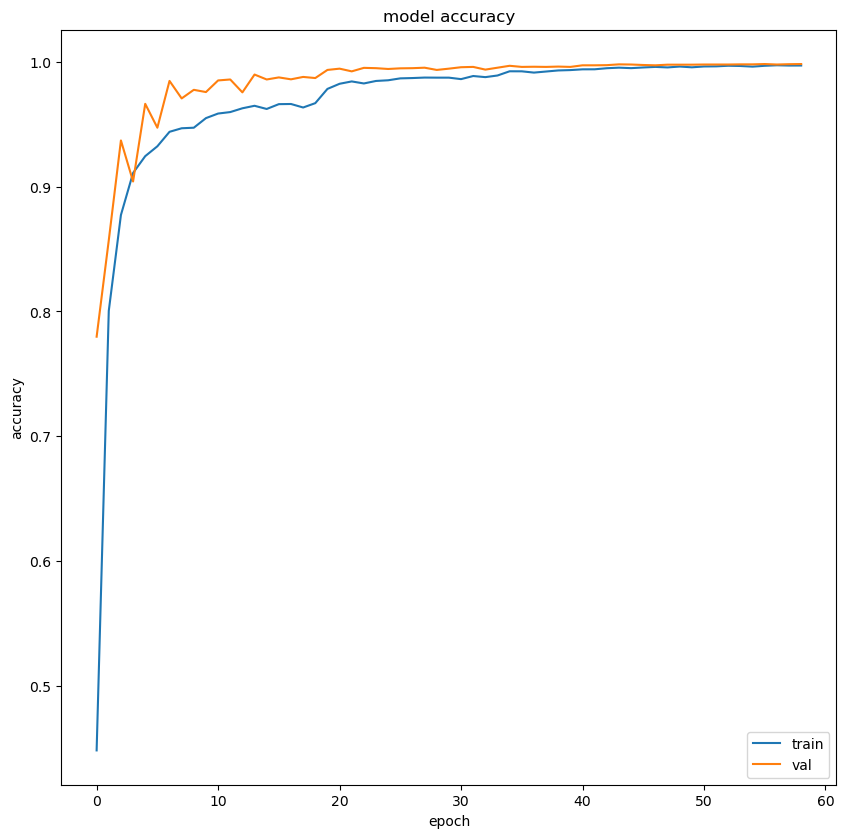

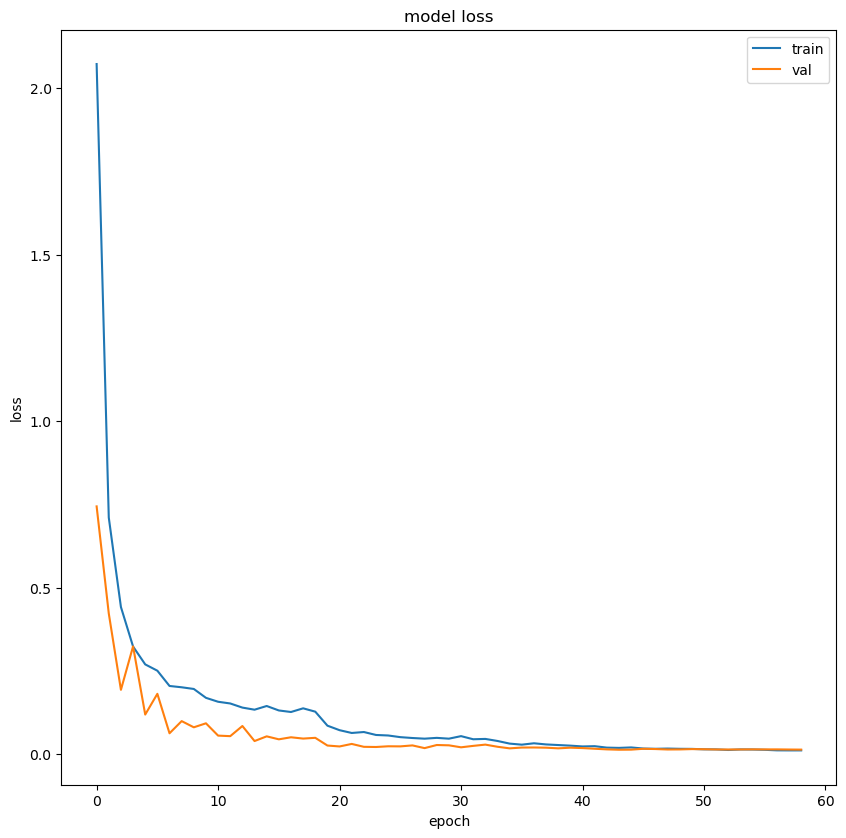

In [4]:
ensemble.plot_history()

In [2]:
X_test_grayscale, y_test = vpc_data.load_testing_data()

Loading testing data from 43 directories
Test images loaded.
test_gray data shape:  (12630, 30, 30, 1)
test_labels shape:  (12630,)


Predictions:  [ 0  0  0 ... 42 42 42]
(12630,)
Test Data accuracy:  98.06809184481394
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        60
           1       1.00      1.00      1.00       720
           2       0.99      1.00      1.00       750
           3       1.00      0.95      0.97       450
           4       0.99      0.99      0.99       660
           5       0.96      0.99      0.97       630
           6       1.00      0.92      0.96       150
           7       0.98      0.99      0.98       450
           8       0.99      0.97      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      0.99       660
          11       0.96      0.98      0.97       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      0.99      0.97      

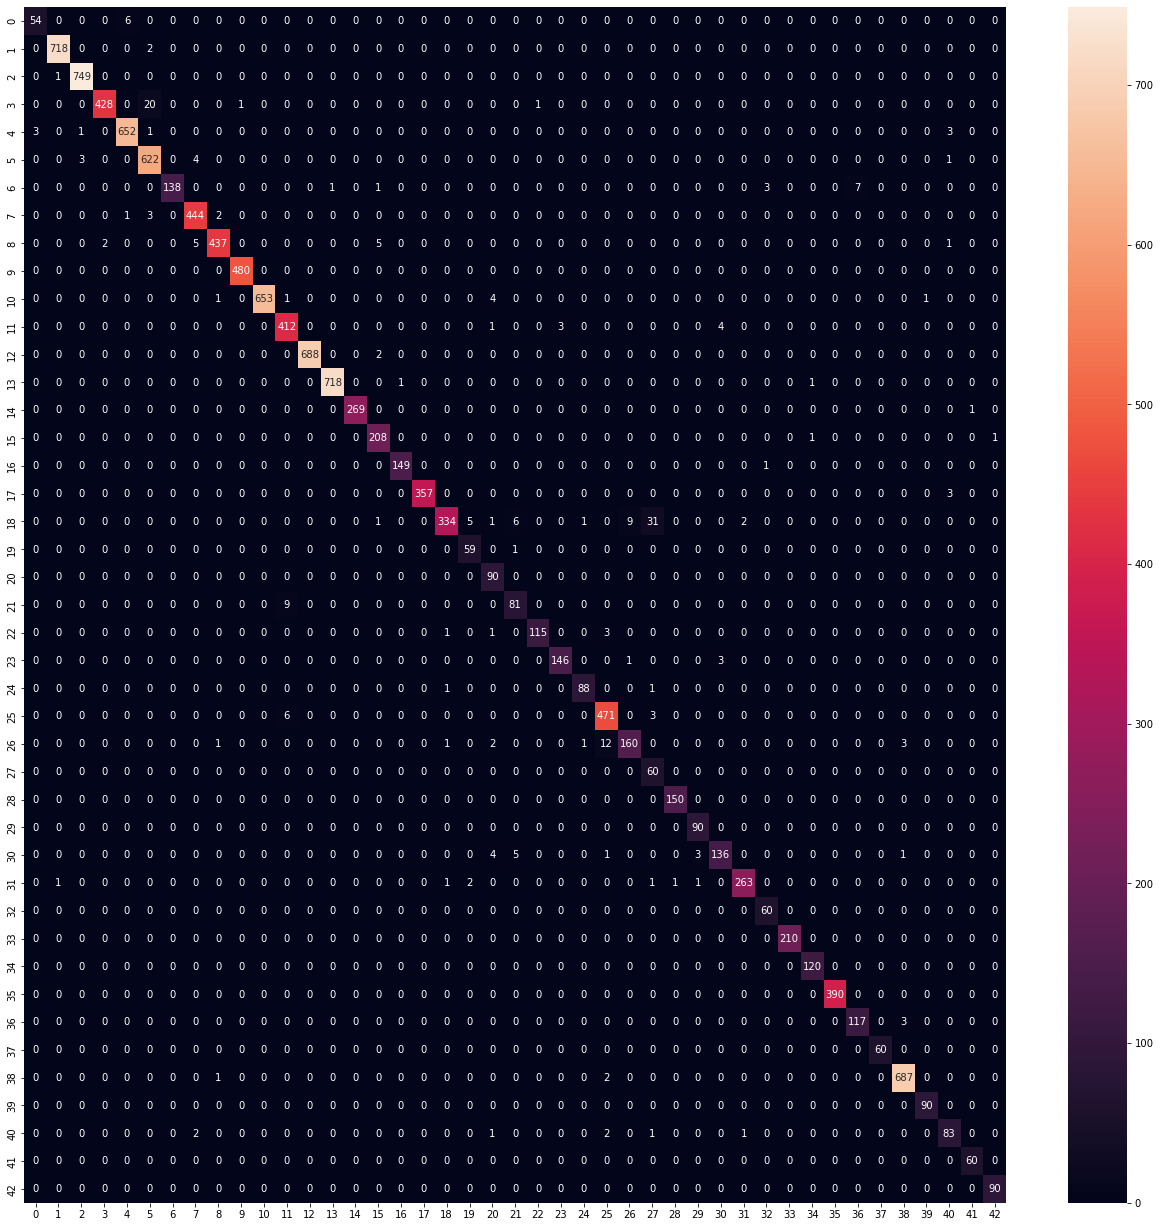

In [6]:
ensemble.evaluate_ensemble(X_test_grayscale, y_test)

In [3]:
loaded_ensemble_5c_gray = vpc_ensemble_model_5c.EnsembleModel5C("EnsembleModel5C", img_size=30)
loaded_ensemble_5c_gray.load_full_model()
loaded_ensemble_5c_gray.evaluate_error(X_test_grayscale, y_test)

Model: "MemberModelC0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30, 1)]       0         
_________________________________________________________________
resizing (Resizing)          (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)     